## Predição de Preço Máximo de Revenda do Diesel
#### Planilha fornecida pela A.N.P. (Agência Nacional do Petróleo)
###### Link: http://www.anp.gov.br/images/Precos/Mensal2013/MENSAL_BRASIL-DESDE_Fev2013.xlsx

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
def split_data(X,Y):
    return train_test_split(X, Y, test_size=0.4, random_state=0)

def model_train(X_train, X_test, Y_train, Y_test, lin_regressor):    
    X_train1 = np.reshape(X_train, (-1, 1))
    Y_train1 = np.reshape(Y_train, (-1, 1))    
    X_test1  = np.reshape(X_test, (-1, 1))
    Y_test1  = np.reshape(Y_test, (-1, 1))        
    y_pred   = predict(X_train1, Y_train1, lin_regressor)
    return y_pred, X_test1, Y_test1, X_train1, Y_train1

def predict( X_train1, Y_train1, lin_regressor) :    
    lin_regressor.fit(X_train1, Y_train1)    
    return lin_regressor.predict( X_train1 )    

In [3]:
df  =  pd.read_csv('combustiveis.csv', delimiter=";", encoding="ISO-8859-1")
df.head(20)

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,jan/13,ÓLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.230,0.053,1.926,0.080,1.398,2.570,0.042
1,jan/13,ÓLEO DIESEL S10,4741,R$/l,2.235,0.108,1.990,2.950,0.245,0.048,1.990,0.073,1.800,2.470,0.037
2,jan/13,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.266,0.125,1.690,0.222,1.220,2.475,0.131
3,jan/13,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.386,0.054,2.377,0.109,2.080,2.895,0.046
4,jan/13,GLP,39597,R$/13kg,40.164,3.964,26.000,62.000,10.310,0.099,29.854,4.462,15.000,45.000,0.149
5,jan/13,GNV,2401,R$/m3,1.764,0.171,1.379,2.599,0.407,0.097,1.357,0.154,0.835,1.913,0.113
6,fev/13,ÓLEO DIESEL,26614,R$/l,2.252,0.114,1.949,2.980,0.263,0.051,1.989,0.086,1.475,2.570,0.043
7,fev/13,ÓLEO DIESEL S10,6671,R$/l,2.330,0.116,2.059,3.050,0.267,0.050,2.063,0.086,1.796,2.554,0.042
8,fev/13,ETANOL HIDRATADO,32570,R$/l,2.000,0.239,1.480,3.150,0.267,0.120,1.733,0.217,1.300,2.601,0.125
9,fev/13,GASOLINA COMUM,34664,R$/l,2.887,0.146,2.390,3.899,0.424,0.051,2.463,0.106,2.095,2.965,0.043


In [4]:
filter1  =  df['PRODUTO']=='ÓLEO DIESEL'
df2      =  df[filter1]
df2.head(10)

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,jan/13,ÓLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.95,0.230,0.053,1.926,0.080,1.398,2.570,0.042
6,fev/13,ÓLEO DIESEL,26614,R$/l,2.252,0.114,1.949,2.98,0.263,0.051,1.989,0.086,1.475,2.570,0.043
12,mar/13,ÓLEO DIESEL,26438,R$/l,2.301,0.118,1.949,2.99,0.264,0.051,2.037,0.087,1.680,2.602,0.043
18,abr/13,ÓLEO DIESEL,29656,R$/l,2.332,0.114,1.899,3.02,0.272,0.049,2.060,0.084,1.638,2.690,0.041
24,mai/13,ÓLEO DIESEL,28753,R$/l,2.333,0.114,1.969,3.06,0.274,0.049,2.059,0.082,1.650,2.607,0.040
30,jun/13,ÓLEO DIESEL,25620,R$/l,2.333,0.115,1.949,3.06,0.277,0.049,2.056,0.081,1.750,2.607,0.039
36,jul/13,ÓLEO DIESEL,31274,R$/l,2.333,0.115,1.969,3.06,0.278,0.049,2.055,0.082,1.700,2.650,0.040
42,ago/13,ÓLEO DIESEL,26091,R$/l,2.331,0.115,1.989,3.06,0.281,0.049,2.050,0.083,1.752,2.656,0.040
48,set/13,ÓLEO DIESEL,27230,R$/l,2.331,0.116,1.989,3.06,0.280,0.050,2.051,0.083,1.720,2.656,0.040
54,out/13,ÓLEO DIESEL,29298,R$/l,2.332,0.117,1.949,3.06,0.283,0.050,2.049,0.084,1.480,2.656,0.041


In [5]:
X  =  df2.iloc[0: ,6].values
Y  =  df2.iloc[0: ,7].values

## Treinar os dados

In [6]:
lin_regressor = LinearRegression()
X_train, X_test, Y_train, Y_test  =  split_data(X,Y)
y_pred, X_test1, Y_test1, X_train1, Y_train1 = model_train(X_train, X_test, Y_train, Y_test, lin_regressor)

## Acuracia do modelo 1.0 == 100%

In [7]:
r_square = r2_score( Y_train1, y_pred )
print( r_square )

0.9389112619393482


## Regressão linear dos dados

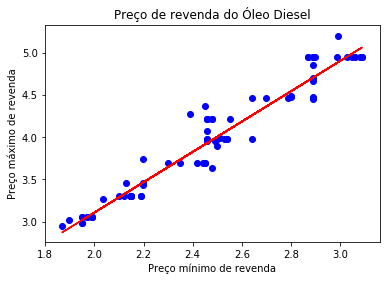

In [11]:
plt.scatter(X, Y, color="blue")
plt.plot(X_train1, y_pred, color='red')
plt.title( "Preço de revenda do Óleo Diesel" )
plt.xlabel( "Preço mínimo de revenda" )
plt.ylabel( "Preço máximo de revenda" )
plt.show()

## Teste do modelo

In [15]:
price_min  = 3.029
tran_price = np.reshape(price_min, (1,1))
preg_price = lin_regressor.predict(tran_price)
print( preg_price )

[[4.95599726]]
